In [1]:
import sys
import os

# Get the path to the current working directory
current_dir = os.getcwd()

# Get the path to the parent directory (containing both A.py and 'B' directory)
parent_dir = os.path.dirname(current_dir)

london_data_dir = os.path.join(parent_dir, 'Data/Irish_dataset/preprocessed')
results_dir = os.path.join(current_dir, 'resultsIreland')
# Append the parent directory to the module search path
sys.path.append(parent_dir)

import pickle 
from sklearn.tree import DecisionTreeRegressor, export_text
from scengen.generators import PredClusGenerator, SampleGenerator, RandomGenerator
from sklearn import tree
import pandas as pd
import graphviz


with open(os.path.join(results_dir,"notebooks/resultsIreland/ThesisResults/PCT_D8_M250_london_dataset_with_buffer_feb_0.pkl"), 'rb') as file:
    loaded_model = pickle.load(file)
time_df = pd.read_pickle("notebooks/visualisationresults/t_buffer_feb_ireland.pkl")
attributes_df = pd.read_pickle("notebooks/visualisationresults/a_buffer_feb_ireland.pkl")
vistree = loaded_model.to_visualization_tree(attributes_df, time_df)


In [2]:
import pandas as pd

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Alternatively, create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# You can print or view the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: yearly_consumption, Importance: 0.7541079797018329
Feature: sameseason, Importance: 0.049983948311017365
Feature: sunHour, Importance: 0.024148970993577795
Feature: night_total_consumption, Importance: 0.021632754598692884
Feature: evening_total_consumption, Importance: 0.016857287631658488
Feature: dayOfWeek, Importance: 0.014792628838331146
Feature: lunch_total_consumption_weekday, Importance: 0.013216827386963635
Feature: season, Importance: 0.009337455906949422
Feature: night_total_consumption_weekday, Importance: 0.009115376917309377
Feature: total_consumption_buffer, Importance: 0.008158790962924857
Feature: isWeekend, Importance: 0.006514189975043054
Feature: morning_total_consumption, Importance: 0.006365018842571348
Feature: lunch_total_consumption, Importance: 0.0059820034388313684
Feature: morning_total_consumption_weekday, Importance: 0.0056458128701835095
Feature: night_peak, Importance: 0.005619149536394701
Feature: feelsLikeC, Importance: 0.005405931831943012
Fe

In [3]:
from data_preprocessing.get_buffer_attributes import BufferAttributesCalculator
calculator = BufferAttributesCalculator(None)
column_names = list(calculator.column_functions.keys())
columns_weekday = [f"{column}_weekday" for column in column_names]
columns_weekend = [f"{column}_weekend" for column in column_names]

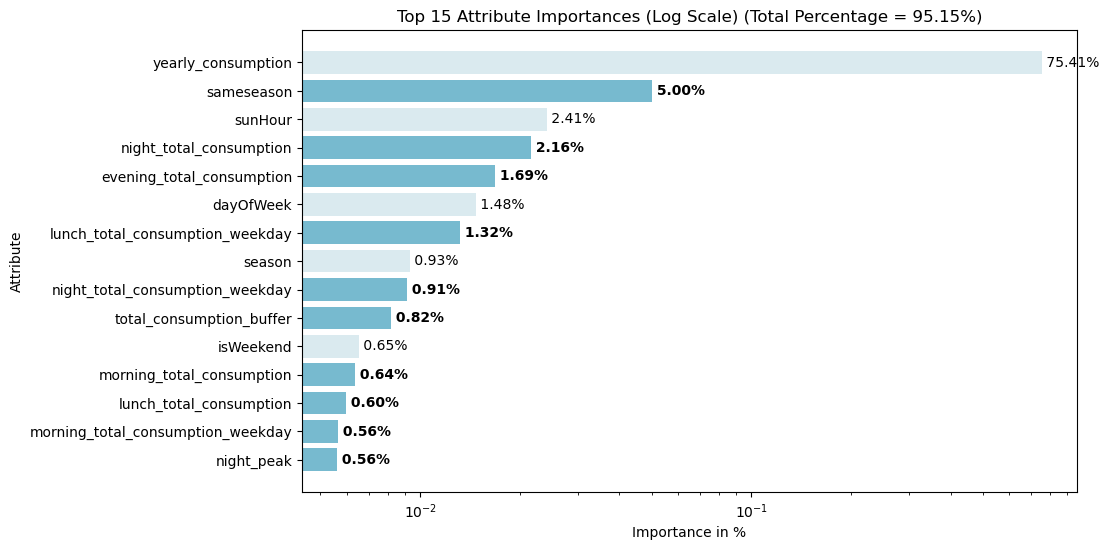

Total importance percentage covered by top 15 features: 95.15%


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_color = '#1D8DB0'
palette = sns.light_palette(base_color, n_colors=15)

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Extract top 15 features and their importances
top_features = [x[0] for x in sorted_feature_importances[:15]]
top_importances = [x[1] for x in sorted_feature_importances[:15]]

total_importance_percentage = sum(top_importances) * 100
# List of special features

# Plotting
plt.figure(figsize=(10, 6))
for feature, importance in zip(top_features, top_importances):
    color = palette[3]
    weight = 'normal'
    if feature in special_attributes or feature == "sameseason":
        color = palette[14]
        weight = 'bold'
    plt.barh(feature, importance, color=color, alpha=0.6)
    plt.text(importance, feature, f' {importance:.2%}', ha='left', va='center', weight=weight)
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.xlabel('Importance in %')
plt.ylabel('Attribute')
plt.title(f'Top 15 Attribute Importances (Log Scale) (Total Percentage = {total_importance_percentage:.2f}%)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.savefig('notebooks/pictures/featureimportancesIreland.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()
print(f'Total importance percentage covered by top 15 features: {total_importance_percentage:.2f}%')



In [5]:
from data_preprocessing.get_buffer_attributes import BufferAttributesCalculator
calculator = BufferAttributesCalculator(None)
column_names = list(calculator.column_functions.keys())
columns_weekday = [f"{column}_weekday" for column in column_names]
columns_weekend = [f"{column}_weekend" for column in column_names]

In [6]:
import pandas as pd

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = dict(zip(feature_names, importances))

# Alternatively, create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# You can print or view the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: yearly_consumption, Importance: 0.7541079797018329
Feature: sameseason, Importance: 0.049983948311017365
Feature: sunHour, Importance: 0.024148970993577795
Feature: night_total_consumption, Importance: 0.021632754598692884
Feature: evening_total_consumption, Importance: 0.016857287631658488
Feature: dayOfWeek, Importance: 0.014792628838331146
Feature: lunch_total_consumption_weekday, Importance: 0.013216827386963635
Feature: season, Importance: 0.009337455906949422
Feature: night_total_consumption_weekday, Importance: 0.009115376917309377
Feature: total_consumption_buffer, Importance: 0.008158790962924857
Feature: isWeekend, Importance: 0.006514189975043054
Feature: morning_total_consumption, Importance: 0.006365018842571348
Feature: lunch_total_consumption, Importance: 0.0059820034388313684
Feature: morning_total_consumption_weekday, Importance: 0.0056458128701835095
Feature: night_peak, Importance: 0.005619149536394701
Feature: feelsLikeC, Importance: 0.005405931831943012
Fe

In [7]:
import pandas as pd

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Print the top 15 feature importances in a visually appealing format
print("Top 15 Feature Importances:")
print("---------------------------")
for rank, (feature, importance) in enumerate(sorted_feature_importances[:15], start=1):
    print(f"{rank}. {feature}: {importance:.4f}")


Top 15 Feature Importances:
---------------------------
1. yearly_consumption: 0.7541
2. sameseason: 0.0500
3. sunHour: 0.0241
4. night_total_consumption: 0.0216
5. evening_total_consumption: 0.0169
6. dayOfWeek: 0.0148
7. lunch_total_consumption_weekday: 0.0132
8. season: 0.0093
9. night_total_consumption_weekday: 0.0091
10. total_consumption_buffer: 0.0082
11. isWeekend: 0.0065
12. morning_total_consumption: 0.0064
13. lunch_total_consumption: 0.0060
14. morning_total_consumption_weekday: 0.0056
15. night_peak: 0.0056


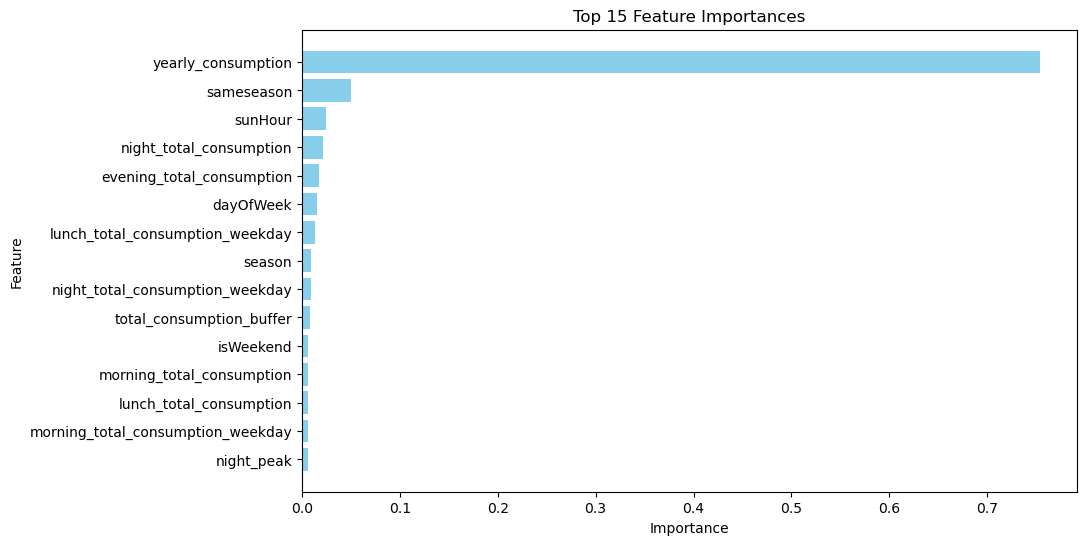

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Extract top 15 features and their importances
top_features = [x[0] for x in sorted_feature_importances[:15]]
top_importances = [x[1] for x in sorted_feature_importances[:15]]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


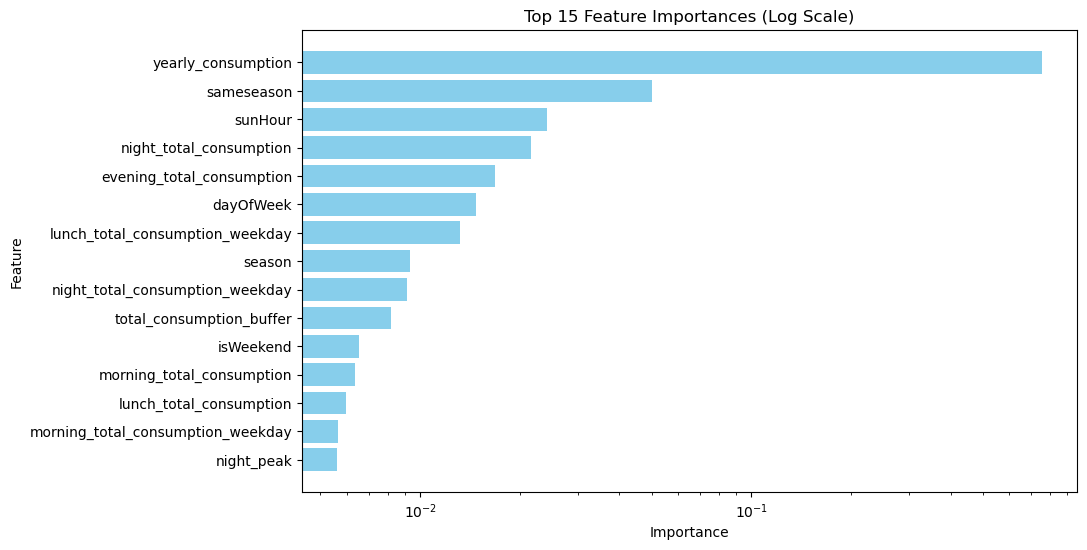

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X_train' is your training DataFrame and 'model' is your trained DecisionTreeRegressor
feature_names = attributes_df.columns
importances = loaded_model.tree.feature_importances_

# Create a sorted list of tuples for better visualization
sorted_feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Extract top 15 features and their importances
top_features = [x[0] for x in sorted_feature_importances[:15]]
top_importances = [x[1] for x in sorted_feature_importances[:15]]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xscale('log')  # Set x-axis scale to logarithmic
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importances (Log Scale)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [10]:
import pygraphviz as pgv
from io import StringIO

# DOT data stored in a variable
dot_data = tree.export_graphviz(loaded_model.tree, out_file=None, feature_names=attributes_df.columns.tolist(), filled=True, rounded=True)

# Convert DOT data to a file-like object
dot_file_object = StringIO(dot_data)

# Load DOT data
graph = pgv.AGraph(string=dot_file_object.read())

# List of special attributes
special_attributes = column_names + columns_weekday + columns_weekend

# Function to check if a node label contains a special attribute
def has_special_attribute(label):
    return any(attr in label for attr in special_attributes)
def has_time_attribute(label):
    return any(attr in label for attr in ["TimeFromBuffer"])

# Iterate through nodes and color nodes with special attributes
used_special_attributes = []
for node in graph.nodes():
    if has_special_attribute(node.attr['label']):
        node.attr['fillcolor'] = 'blue'
        special_attributes.append(node.attr['label'])
# for node in graph.nodes():
#     if has_time_attribute(node.attr['label']):
#         node.attr['fillcolor'] = 'green'

# Save the modified DOT file
output_dot_data = graph.to_string()
# Now you can use the modified DOT data as needed



In [12]:


# Visualize the decision tree using Graphviz
graph = graphviz.Source(output_dot_data)
graph.render("decision_tree", format="pdf", cleanup=True, view=True)
graph.view("decision_tree")   

'decision_tree.pdf'